In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import time
import numpy as np

In [2]:
from ML.GBR import GradientBoosting 

In [3]:
# Load the dataset
train_file_path = "./datasets/Train_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
train_data = pd.read_csv(train_file_path)

eval_file_path = "./datasets/Eval_Pre_Processed_Dataset.csv"  # Replace with the path to your CSV file
eval_data = pd.read_csv(eval_file_path)

In [4]:
#Define levels
levels=5

# Parse relevant columns for all bid and ask levels
bid_columns = [f"bids[{i}].price" for i in range(levels)] + [f"bids[{i}].amount" for i in range(levels)]
ask_columns = [f"asks[{i}].price" for i in range(levels)] + [f"asks[{i}].amount" for i in range(levels)]
feature_columns = bid_columns  + ask_columns + ["mark_price"]
eval_columns=['mark_price','next_mark_price','Price Movement',"actual_direction"]

# Features and target
X_train = train_data[feature_columns]
y_train = train_data['next_mark_price']
# X_test = test_data[feature_columns]
# y_test = test_data["target"]
X_eval = eval_data[feature_columns]

y_eval = eval_data[eval_columns]

In [5]:
X_train

,bids[0].price,bids[1].price,bids[2].price,bids[3].price,bids[4].price,bids[0].amount,bids[1].amount,bids[2].amount,bids[3].amount,bids[4].amount,...,asks[1].price,asks[2].price,asks[3].price,asks[4].price,asks[0].amount,asks[1].amount,asks[2].amount,asks[3].amount,asks[4].amount,mark_price
0,58970.5,58967.5,58967.0,58964.5,58963.0,7050.0,37500.0,10000.0,10330.0,1280.0,...,58972.5,58975.0,58975.5,58976.0,172780.0,6500.0,16500.0,35900.0,1290.0,58970.45
1,58970.5,58967.5,58967.0,58964.5,58963.0,7050.0,37500.0,10000.0,10330.0,1280.0,...,58972.5,58975.0,58975.5,58976.0,172780.0,6500.0,16500.0,35900.0,1290.0,58970.45
2,58970.5,58967.5,58967.0,58964.5,58963.0,7050.0,37500.0,10000.0,10330.0,1280.0,...,58972.5,58975.0,58975.5,58976.0,179840.0,6500.0,16500.0,35900.0,1290.0,58970.44
3,58970.5,58967.5,58967.0,58964.5,58963.0,7050.0,37500.0,10000.0,10330.0,31280.0,...,58972.5,58975.0,58975.5,58976.0,179840.0,6500.0,16500.0,35900.0,1290.0,58969.40
4,58970.5,58967.5,58967.0,58965.5,58965.0,2310.0,37500.0,10000.0,30000.0,101000.0,...,58972.5,58975.0,58975.5,58976.0,179840.0,6500.0,16500.0,35900.0,1290.0,58969.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207355,57716.5,57699.0,57698.5,57696.0,57693.5,400.0,1000.0,29500.0,30.0,6810.0,...,57718.0,57718.5,57721.5,57722.0,283990.0,16500.0,36340.0,29500.0,87360.0,57718.61
207356,57708.0,57699.5,57699.0,57696.0,57693.5,400.0,46100.0,250.0,30.0,6810.0,...,57709.0,57711.5,57714.0,57717.0,88800.0,29500.0,450.0,14910.0,146650.0,57718.14
207357,57708.0,57699.5,57699.0,57696.0,57693.5,1760.0,46100.0,250.0,29530.0,6810.0,...,57710.5,57713.0,57713.5,57714.0,105730.0,8240.0,16620.0,58780.0,14910.0,57711.81
207358,57708.0,57699.5,57699.0,57696.0,57693.5,1760.0,46100.0,250.0,29530.0,6810.0,...,57712.0,57712.5,57713.0,57713.5,97490.0,16480.0,13990.0,16620.0,44790.0,57711.81


In [6]:
GradientBoostingRegressor=GradientBoosting(X_train,y_train,X_eval)

In [9]:
# if not yet trained
GradientBoostingRegressor.train()

In [8]:
# Find the best parameter 
# GradientBoostingRegressor.findparameter()

In [10]:
# Predict 
# Measure the execution time of the function
start_time = time.time()
GB_Predict_data=pd.DataFrame({"predicted_gb":GradientBoostingRegressor.predict()})
end_time = time.time()
execution_time = (end_time - start_time)* 1000 
print(f"Execution_time(Gradient Boosting): {execution_time:.2f} milliseconds")

Execution_time(Gradient Boosting): 68.39 milliseconds


In [11]:
# combine data tgt
Evaluate_result=pd.concat([y_eval, GB_Predict_data], axis=1)

In [12]:
# Evaluate performance using MSE on evaluation set
mse_gb = mean_squared_error(Evaluate_result['next_mark_price'], Evaluate_result['predicted_gb'])
print(f"Gradient Boosting MSE (Eval Set): {mse_gb:.2f}")

Gradient Boosting MSE (Eval Set): 205.22


In [13]:
# Calculate directional accuracy
Evaluate_result.loc[:, "predicted_direction_gb"] = np.sign(Evaluate_result["predicted_gb"] - Evaluate_result["next_mark_price"])
directional_accuracy_gb = (Evaluate_result["actual_direction"] == Evaluate_result["predicted_direction_gb"]).mean()
print(f"Directional Accuracy (Gradient Boosting): {directional_accuracy_gb:.2%}")

Directional Accuracy (Gradient Boosting): 19.63%


In [14]:
# Tolerance-Based Accuracy
tolerance = 0.0001 * Evaluate_result["next_mark_price"].mean()  # Set tolerance to 0.01% of average price
Evaluate_result.loc[:, "tolerance_gb"] = abs(Evaluate_result["predicted_gb"] - Evaluate_result["next_mark_price"]) <= tolerance

# Calculate tolerance-based accuracy
tolerance_accuracy_gb = Evaluate_result["tolerance_gb"].mean()

print(f"Tolerance-Based Accuracy (Gradient Boosting): {tolerance_accuracy_gb:.2%}")

Tolerance-Based Accuracy (Gradient Boosting): 54.67%


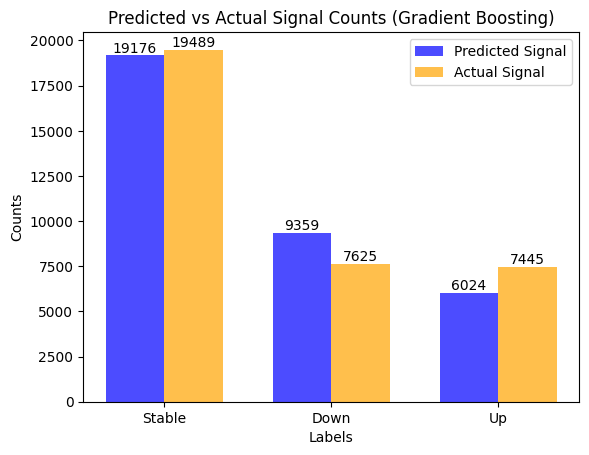

In [15]:
# Add symbol columns based on comparison with the last mark price
symbol_tolerance = 0.0001 * eval_data["next_mark_price"].mean()  # Adjust as needed
Evaluate_result.loc[:, "symbol_gb"] = None

for i in range(len(Evaluate_result)):

    # Linear Regression symbol logic
    if Evaluate_result["predicted_gb"].iloc[i] > Evaluate_result["mark_price"].iloc[i] + symbol_tolerance:
        Evaluate_result.loc[Evaluate_result.index[i], "symbol_gb"] = "up"
    elif Evaluate_result["predicted_gb"].iloc[i] < Evaluate_result["mark_price"].iloc[i] - symbol_tolerance:
        Evaluate_result.loc[Evaluate_result.index[i], "symbol_gb"] = "down"
    else:
        Evaluate_result.loc[Evaluate_result.index[i], "symbol_gb"] = "stable"

# Visualize symbol distributions
symbol_counts_gb = Evaluate_result["symbol_gb"].value_counts()
Actual_signal_counts = Evaluate_result["Price Movement"].value_counts()

gb_predict_values = symbol_counts_gb.values.tolist()
actual_values = Actual_signal_counts.values.tolist()

labels = Actual_signal_counts.index.tolist()

# Setting the positions and width for the bars
positions = np.arange(len(labels))
bar_width = 0.35


# Create the bar plot
bar1=plt.bar(positions, gb_predict_values, bar_width, label='Predicted Signal', color='b', alpha=0.7)
bar2=plt.bar(positions + bar_width, actual_values, bar_width, label='Actual Signal', color='orange', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Predicted vs Actual Signal Counts (Gradient Boosting)')
plt.xticks(positions + bar_width / 2, labels)
plt.legend()

# Displaying the values on top of each bar
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')


plt.show()

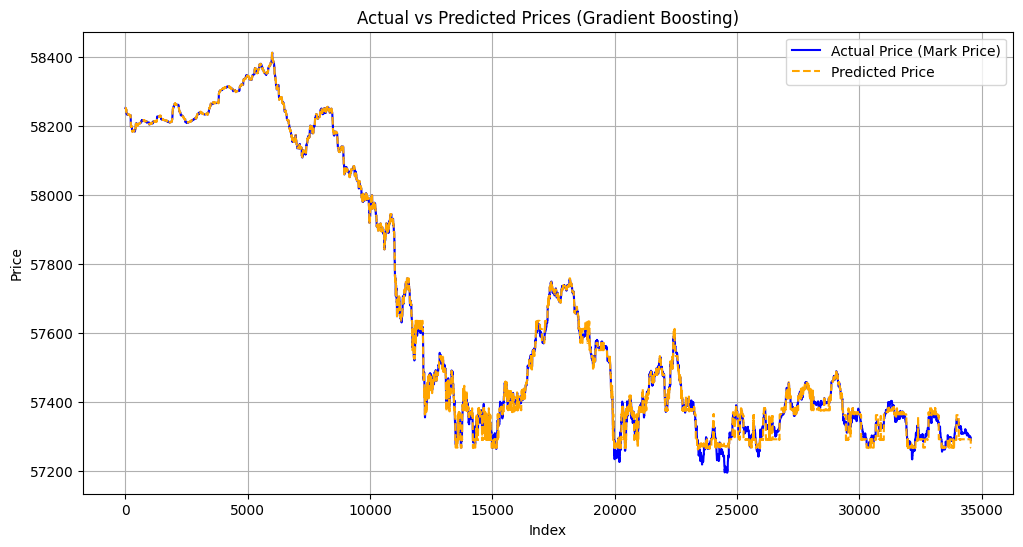

In [16]:
# Visualize the actual vs. predicted price along with signals
plt.figure(figsize=(12, 6))
plt.plot(Evaluate_result["mark_price"], label="Actual Price (Mark Price)", color="blue")
plt.plot(Evaluate_result["predicted_gb"], label="Predicted Price", color="orange", linestyle="--")
plt.title("Actual vs Predicted Prices (Gradient Boosting)")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
